## S&P500 Predictions with FBProphet

S&P500 data for time series analysis and forecasting future prices with Prophet. More info <a href="https://www.kaggle.com/camnugent/sandp500">here.</a>

### Table of Contents

1. [Imports](#Imports)    
2. [Data](#Data)  
3. [EDA](#EDA)    
4. [Forecasts](#Forecasts)  
  4.1 [Individuals](#Individuals)  
  4.2 [Random](#Random)

### Imports

In [1]:
# main
import numpy as np
import pandas as pd
import scipy.stats as stats
import pickle
import random

# datetimes
import datetime as dt
from datetime import datetime
import time

# dataviz
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# plot style
%config InteractiveShellApp.pylab_import_all = False
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 5)

plt.style.use('seaborn-colorblind')

# outline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%precision %.3f

# pandas display
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Data

In [2]:
# import data
df = pd.read_csv("../data/all_stocks_5yr.csv", parse_dates = True,index_col = 'date')
df['date'] = df.index
df.drop(['open','high','low','volume'],axis=1,inplace=True)

In [3]:
df.head()

,close,Name,date
date,,,
2013-02-08,14.75,AAL,2013-02-08
2013-02-11,14.46,AAL,2013-02-11
2013-02-12,14.27,AAL,2013-02-12
2013-02-13,14.66,AAL,2013-02-13
2013-02-14,13.99,AAL,2013-02-14


### EDA

In [4]:
len(df)
df.Name.nunique() 
max(df.date)-min(df.date)

619040

505

Timedelta('1825 days 00:00:00')

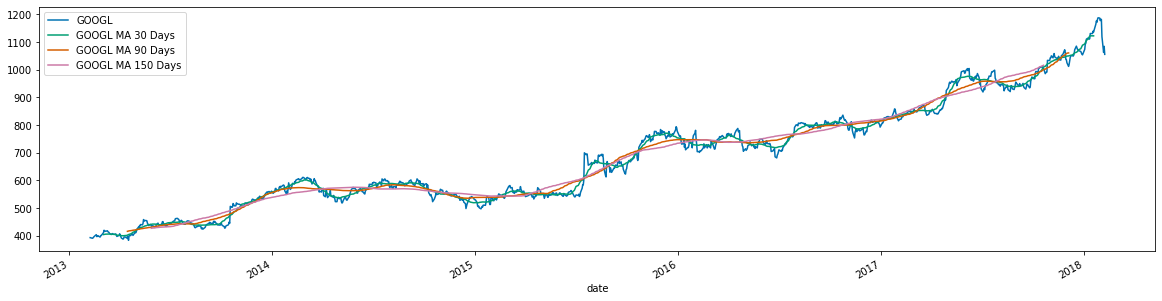

In [5]:
df[df.Name=='GOOGL']['close'].plot(label='GOOGL')

g30 = df[df.Name=='GOOGL']['close'].rolling(30, center=True).mean()
g30.plot(label='GOOGL MA 30 Days')

g90 = df[df.Name=='GOOGL']['close'].rolling(90, center=True).mean()
g90.plot(label='GOOGL MA 90 Days')

g150 = df[df.Name=='GOOGL']['close'].rolling(150, center=True).mean()
g150.plot(label='GOOGL MA 150 Days')

plt.legend()

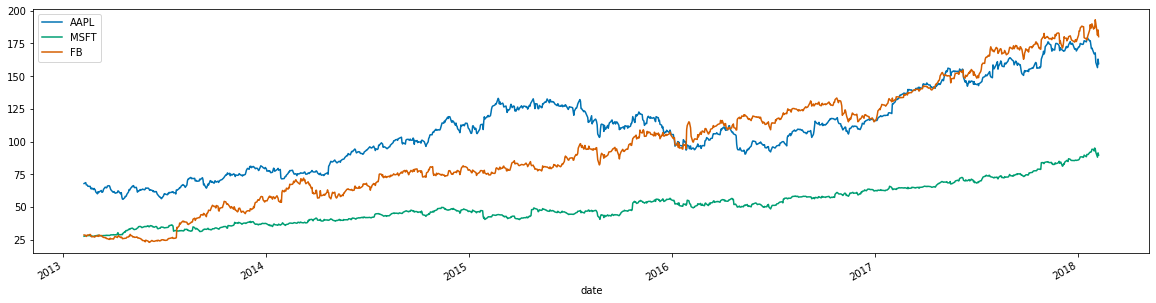

In [6]:
df[df.Name=='AAPL']['close'].plot(label='AAPL')
df[df.Name=='MSFT']['close'].plot(label='MSFT')
df[df.Name=='FB']['close'].plot(label='FB')
plt.legend()

<Figure size 432x432 with 0 Axes>

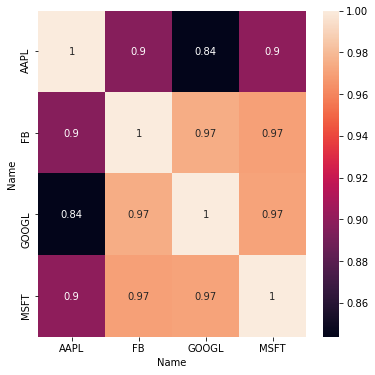

In [7]:
# correlation between these tech stocks
c_list = ['GOOGL','AAPL','MSFT','FB']
df_c = df[df.Name.isin(c_list)].drop('date',axis=1).copy()
df_c = df_c.pivot_table(values='close', index=df_c.index, columns='Name', aggfunc='first')
plt.figure(figsize=(6,6))
sns.heatmap(df_c.corr(), annot=True)

### Forecasts

#### Individuals

In [8]:
from fbprophet import Prophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1, 'Validation Data vs Forecast for Index: GOOGL')

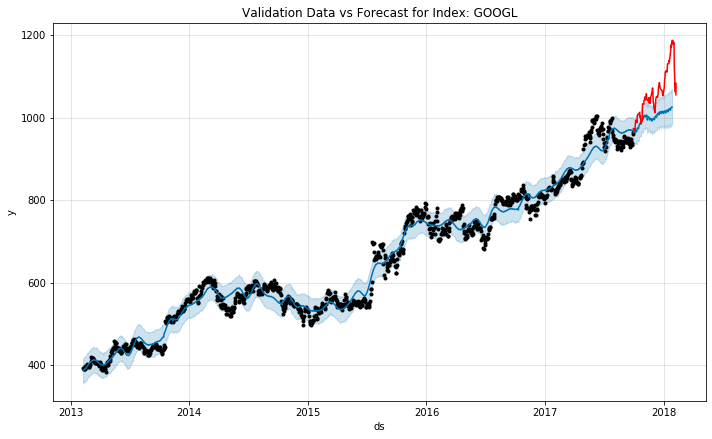

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1, 'Validation Data vs Forecast for Index: AAPL')

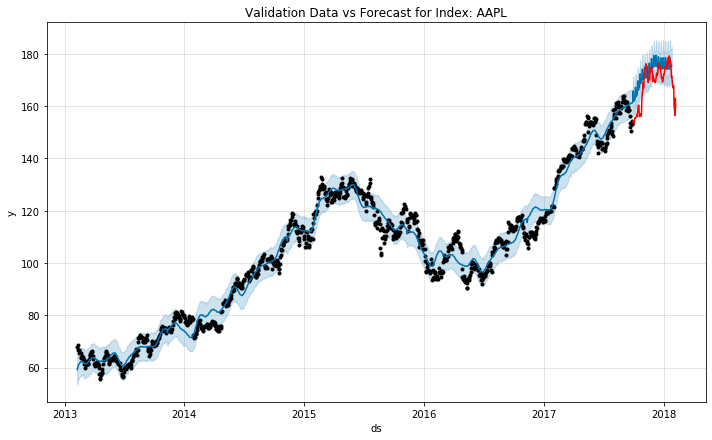

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1, 'Validation Data vs Forecast for Index: MSFT')

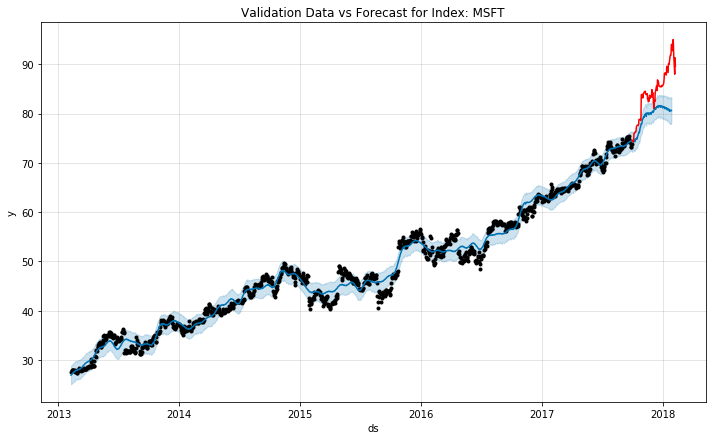

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1, 'Validation Data vs Forecast for Index: FB')

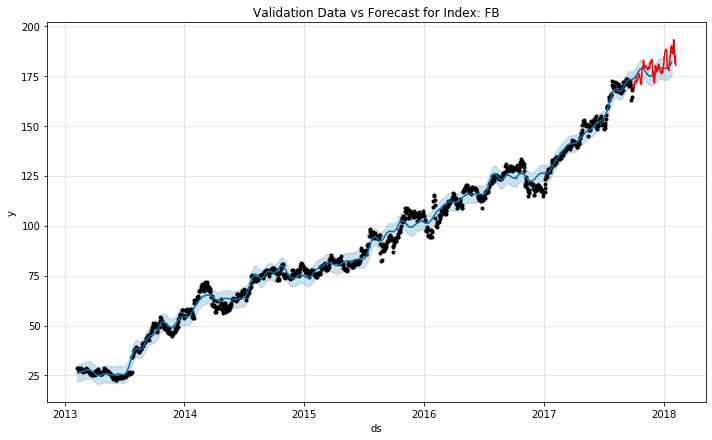

In [9]:
# 'GOOGL', 'AAPL', 'MSFT', 'FB'
dfs = {}
tr = {}
ts = {}
preds = {}
for x in c_list:
    # adjust dfs
    dfs[x]=df[df.Name==x]['close']
    dfs[x]=dfs[x].reset_index().rename(columns ={'date': 'ds','close': 'y'}).sort_values(by='ds')
    
    tr[x]=dfs[x].iloc[:-90]
    ts[x]=dfs[x].iloc[-90:]
    
    # model
    model = Prophet()
    model.add_country_holidays(country_name='US')
    # fit
    model.fit(tr[x])
    future = model.make_future_dataframe(periods=120)
    # preds
    preds[x] = model.predict(future)
    
    # plots    
    f=model.plot(preds[x])
    plt.plot(ts[x]['ds'],ts[x]['y'],color='r',)
    plt.title('Validation Data vs Forecast for Index: '+x)
    plt.show();

#### Random

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


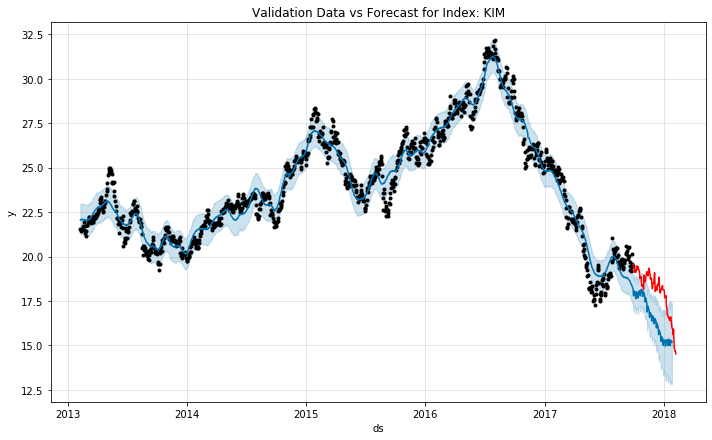

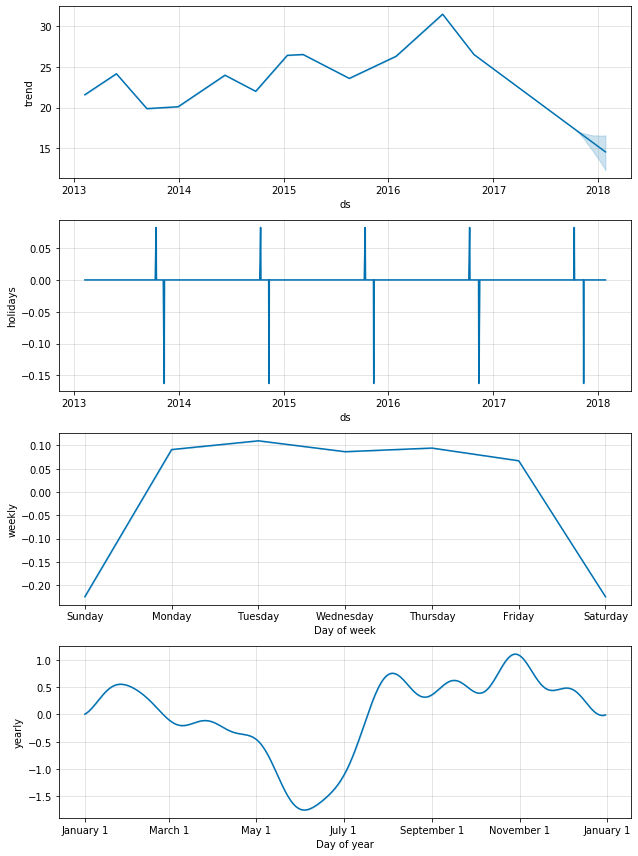

In [10]:
# Prophet

# select random index
n = random.choice(df.Name.unique())
df_n = df[df.Name == n]['close'].reset_index().rename(columns ={'date': 'ds','close': 'y'}).sort_values(by='ds')

# adjust df
tr_n=df_n.iloc[:-90]
ts_n=df_n.iloc[-90:]

# model
model = Prophet()
model.add_country_holidays(country_name='US')
# fit
model.fit(tr_n)
future = model.make_future_dataframe(periods=120)
# preds
preds = model.predict(future)

# plots    
f=model.plot(preds)
plt.plot(ts_n['ds'],ts_n['y'],color='r',)
plt.title('Validation Data vs Forecast for Index: '+n)
plt.show();

c = model.plot_components(preds)
plt.show();